In [1]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
rcParams['figure.dpi']=200

# X

number of processors: 8
Good result: factor 25.88


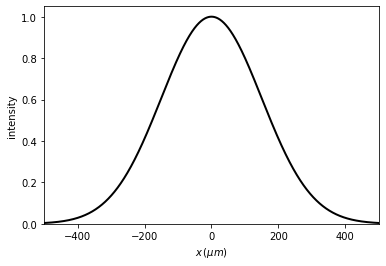

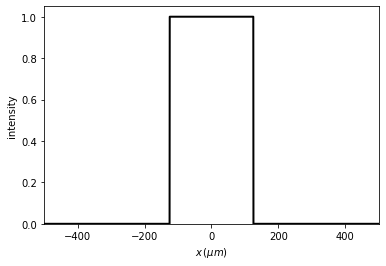

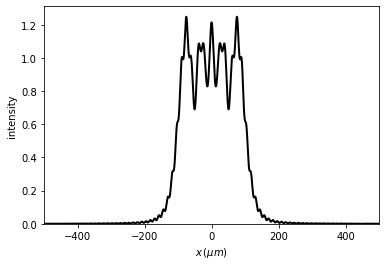

In [2]:
from diffractio import um, nm, mm, np
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

x = np.linspace(-500 * um, 500 * um, 4096)
wavelength = .6328 * um

u0 = Scalar_source_X(x, wavelength)
u0.gauss_beam(x0=0, w0=300*um, z0=0)
u0.draw(filename='x_source.png')

t0=Scalar_mask_X(x, wavelength)
t0.slit(x0=0, size=250*um)
t0.draw(filename='x_mask.png')

u1=t0*u0
u2 = u1.RS(z=5 * mm, new_field=True)
u2.draw(filename='x_RS.png')

# XZ

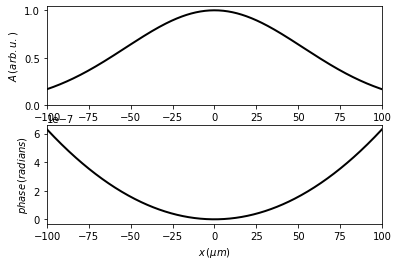

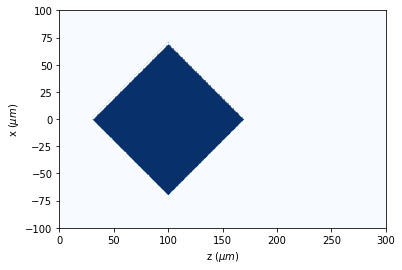

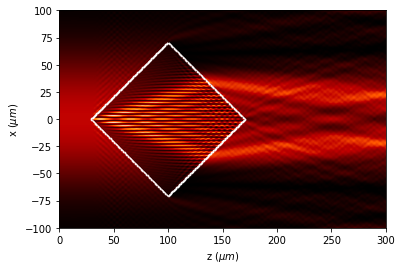

In [13]:
from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 300 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=75 * um, theta=0 * degrees)
u0.draw(kind='field', filename='x_source.png')

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(
    r0=(0 * um, 100 * um),
    size=(100 * um, 100 * um),
    angle=45 * degrees,
    refraction_index=2)

u1.draw_refraction_index(filename='xz_mask.png', scale='scaled')
u1.WPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, filename='xz_WPM.png', scale='scaled');


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f328d027400>)

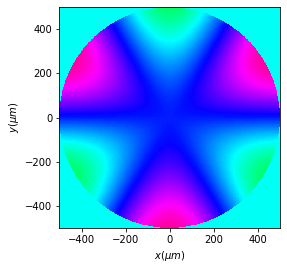

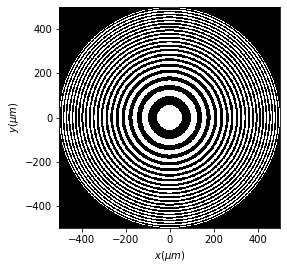

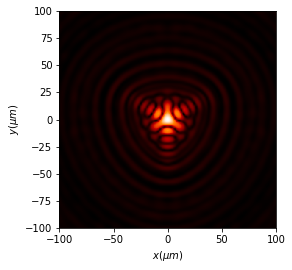

In [22]:
from diffractio import um, nm, mm, np, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


length = 1000*um
x0 = np.linspace(-length/2, length/2, 512)
y0 = np.linspace(-length/2, length/2, 512)
wavelength = 0.6238 * um

focus=10*mm


u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

u0.zernike_beam(A=1, r0=(0, 0), radius=length / 2, n=[ 0,4,], m=[0,3,], c_nm=[ 1,0.25,], mask=True)
u0.draw(kind='phase', filename='xy_source.png')

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(500 * um, 500 * um),
    focal=(focus,focus),
    angle=0 * degrees,
    mask=True,
    kind='amplitude',
    phase=np.pi)
t0.draw(filename='xy_mask.png')

u1 = u0 * t0
u2 = u1.RS(z=focus, new_field=True)
u2.cut_resample(
    x_limits=(-100 * um, 100 * um),
    y_limits=(-100 * um, 100 * um),
    num_points=[1024, 1024],
    new_field=False)
u2.draw(kind='intensity', logarithm=True, filename='xy_RS.png')

# XYZ

In [ ]:
from diffractio import degrees, eps, mm, no_date, np, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 256)
wavelength = .6328 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(10 * um, 10 * um), angle=0 * degrees)
t1.draw(filename='xyz_mask.png')

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=4)
uxyz.draw_XYZ(
    kind='intensity', logarithm=False, normalize='maximum')

In [ ]:
from diffractio import degrees, eps, mm, no_date, np, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 256)
wavelength = .6328 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(10 * um, 10 * um), angle=0 * degrees)
t1.draw(filename='xyz_mask.png')

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=4)
uxyz.draw_XYZ(
    kind='intensity', logarithm=False, normalize='maximum')

uxyz.draw_XZ(y0=0 * mm, logarithm=True, normalize='maximum',filename='xyz_cut.png')

# Vector paraxial XY

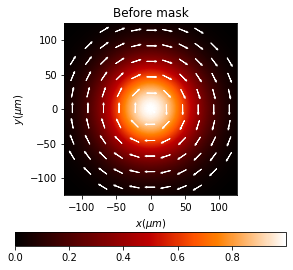

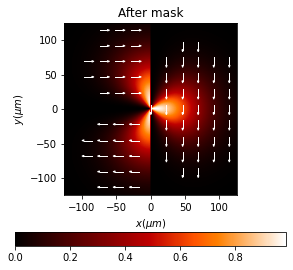

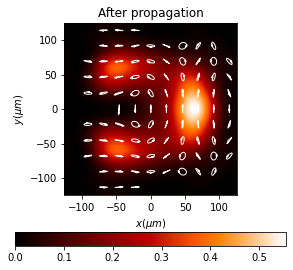

In [33]:
from diffractio import degrees, mm, nm, np, plt, sp, um

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY

x0 = np.linspace(-125 * um, 125 * um, 256)
y0 = np.linspace(-125 * um, 125 * um, 256)

wavelength = 0.6328 * um

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0, 0),
    w0=(100 * um, 100 * um),
    z0=0 * um,
    A=1,
    theta=0. * degrees,
    phi=0 * degrees)

EM0 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM0.radial_wave(u=u0, r0=(0, 0), radius=(200, 200))
EM0.draw(kind='ellipses')
plt.title('Before mask')
plt.savefig('vector_E0_ellipses.png')


t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.two_levels(level1=0, level2=1, x_edge=0, angle=0)

M0 = Vector_paraxial_mask_XY(x=x0, y=y0, wavelength=wavelength)

state_0 = np.array([[1, 0],[0, 0]])
state_1 = np.array([[0, 0],[0, 1]])

M0.complementary_masks(t0, state_0, state_1)

EM1 = EM0 * M0
EM1.draw(kind='ellipses')
plt.title('After mask')
plt.savefig('vector_E1_ellipses.png')

EM2 = EM1.RS(z=10 * mm)


EM2.draw(kind='ellipses')
plt.title('After propagation')
plt.savefig('vector_E2_ellipses.png')